# Make figures for Lecture 1: Plate Tectonics

This notebook uses the data in the `data` folder to make figures for the first lecture. Some require data processing as well.

## General instructions

This is a [Jupyter notebook](https://jupyter.org/) running in [Jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/). The notebook is a programming environment that mixes code (the parts with `[1]: ` or similar next to them) and formatted text/images/equations with [Markdown](https://www.markdownguide.org/basic-syntax) (like this part right here).

Quick start guide:

* **Edit** any cell (blocks of code or text) by double clicking on it.
* **Execute** a code or Markdown cell by typing `Shift + Enter` after selecting it.
* The current active cell is the one with a **blue bar next to it**.
* You can run cells **in any order** as long as the code sequence makes sense (it's best to go top-to-bottom, though).
* To copy any file to the current directory, drag and drop it to the file browser on the left side.
* Notebook files have the extension `.ipynb`.

## Import things

First thing to do is load the Python libraries that we'll be using.

In [1]:
# To open compressed files. Part of the Python standard library. 
import gzip
import bz2
# For making plots and figures
import matplotlib.pyplot as plt
# The base of the entire scientific Python stack
import numpy as np
# For working with tables
import pandas as pd
# For working with grids
import xarray as xr
# Nice colormaps for geoscience
import cmocean
# For plotting with projections
import cartopy.crs as ccrs
# For spatial processing and gridding
import verde as vd

## GPS velocities from the Plate Boundary Observatory

Plot GPS velocities for North America in two different reference frames. Both files were downloaded from the [UNAVCO ftp site](ftp://data-out.unavco.org/pub/products/velocity/). Both files have a row with a misformated number in the "dE/dt" column (a space is missing between this column and the next). Both files in this repository have that value fixed. 

In [2]:
velocities_igs14 = pd.read_csv("../../data/pbo.final_igs14.vel", skiprows=35, delim_whitespace=True)
velocities_igs14

,*Dot#,Name,Ref_epoch,Ref_jday,Ref_X,Ref_Y,Ref_Z,Ref_Nlat,Ref_Elong,Ref_Up...,...,dE/dt,dU/dt,SNd,SEd,SUd,Rne,Rnu,Reu,first_epoch,last_epoch
0,1LSU,Louisiana_St,20180912120000,58373.5,-1.134030e+05,-5.504361e+06,3.209404e+06,30.407425,268.819737,-6.57937,...,-0.01269,-0.00342,0.00021,0.00045,0.00060,0.010,0.054,-0.021,20030426000000,20080615000000
1,1LSU,Louisiana_St,20180912120000,58373.5,-1.134030e+05,-5.504361e+06,3.209404e+06,30.407425,268.819737,-6.58712,...,-0.01269,-0.00342,0.00021,0.00045,0.00060,0.010,0.054,-0.021,20080628000000,20100411000000
2,1LSU,Louisiana_St,20180912120000,58373.5,-1.134030e+05,-5.504361e+06,3.209404e+06,30.407425,268.819737,-6.59651,...,-0.01269,-0.00342,0.00021,0.00045,0.00060,0.010,0.054,-0.021,20100417000000,20140112000000
3,1LSU,Louisiana_St,20180912120000,58373.5,-1.134030e+05,-5.504361e+06,3.209404e+06,30.407425,268.819737,-6.58838,...,-0.01269,-0.00342,0.00021,0.00045,0.00060,0.010,0.054,-0.021,20140118000000,20180624000000
4,1LSU,Louisiana_St,20180912120000,58373.5,-1.134030e+05,-5.504361e+06,3.209404e+06,30.407425,268.819737,-6.58360,...,-0.01269,-0.00342,0.00021,0.00045,0.00060,0.010,0.054,-0.021,20180630000000,20180915000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,ZSE1,Seattle_WAAS_1,20180912120000,58373.5,-2.308930e+06,-3.668169e+06,4.663526e+06,47.286993,237.811626,81.62398,...,-0.01000,-0.00251,0.00016,0.00012,0.00038,0.004,-0.008,-0.004,20030419000000,20070513000000
6052,ZSE1,Seattle_WAAS_1,20180912120000,58373.5,-2.308930e+06,-3.668169e+06,4.663526e+06,47.286993,237.811627,81.63725,...,-0.01000,-0.00251,0.00016,0.00012,0.00038,0.004,-0.008,-0.004,20070519000000,20180915000000
6053,ZTL4,Atlanta_WAAS_4,20180912120000,58373.5,5.298403e+05,-5.305248e+06,3.489343e+06,33.379689,275.703273,260.64896,...,-0.01339,-0.00062,0.00009,0.00006,0.00021,0.026,0.034,-0.075,20021109000000,20030427000000
6054,ZTL4,Atlanta_WAAS_4,20180912120000,58373.5,5.298403e+05,-5.305248e+06,3.489343e+06,33.379689,275.703273,260.67807,...,-0.01339,-0.00062,0.00009,0.00006,0.00021,0.026,0.034,-0.074,20030503000000,20061203000000


The dataset is too dense to be able to see the actual velocity vectors. We'll coarsen the dataset a bit using a blocked median filter from [Verde](https://www.fatiando.org/verde/).

In [3]:
blockmedian = vd.BlockReduce(np.median, spacing=0.8)

In [4]:
coords_median_igs14, velocities_median_igs14 = blockmedian.filter(
    coordinates=(velocities_igs14.Ref_Elong, velocities_igs14.Ref_Nlat), 
    data=(velocities_igs14["dE/dt"], velocities_igs14["dN/dt"])
)

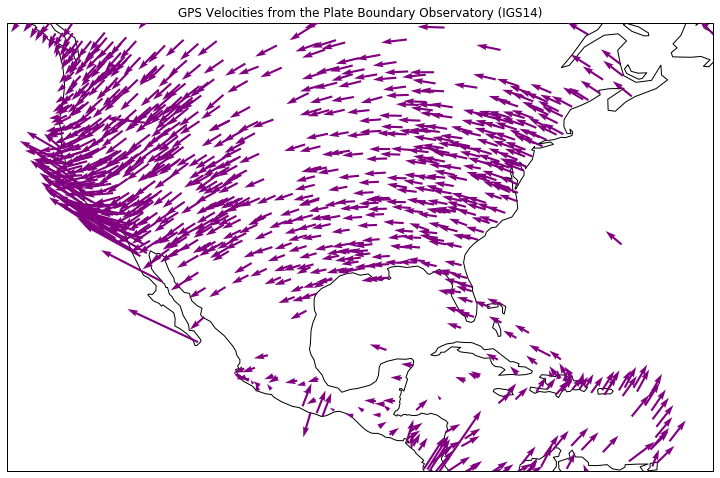

In [5]:
plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_title("GPS Velocities from the Plate Boundary Observatory (IGS14)")
ax.coastlines()
tmp = ax.quiver(
    *coords_median_igs14, 
    *velocities_median_igs14, 
    transform=ccrs.PlateCarree(),
    scale=0.5, 
    width=0.003, 
    color="purple", 
    zorder=1000,
)
# Crop to North America
ax.set_extent([-130, -55, 10, 50], crs=ccrs.PlateCarree())
# Remove some the white space in the borders of the figure
plt.subplots_adjust(top=1, bottom=0, right=0.99, left=0.01, hspace=0, wspace=0)
plt.savefig("gps-igs14.png", dpi=200)
plt.show()

Now repeat the same for the NAM14 reference frame.

In [6]:
velocities_nam14 = pd.read_csv("../../data/pbo.final_nam14.vel", skiprows=35, delim_whitespace=True)

In [7]:
coords_median_nam14, velocities_median_nam14 = blockmedian.filter(
    coordinates=(velocities_nam14.Ref_Elong, velocities_nam14.Ref_Nlat), 
    data=(velocities_nam14["dE/dt"], velocities_nam14["dN/dt"])
)

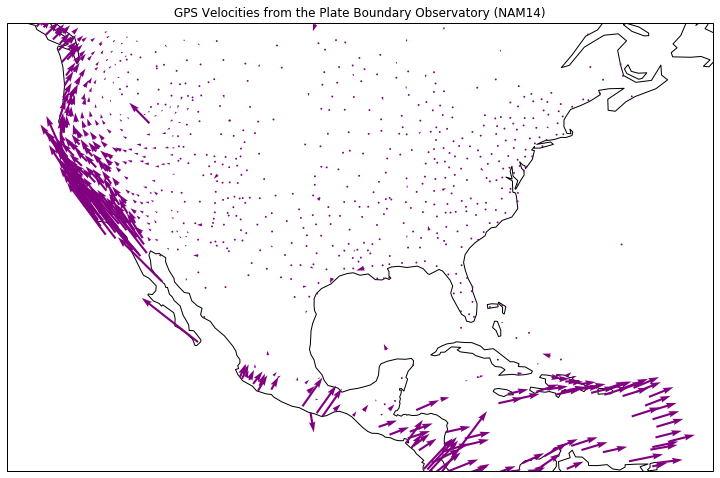

In [8]:
plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_title("GPS Velocities from the Plate Boundary Observatory (NAM14)")
ax.coastlines()
tmp = ax.quiver(
    *coords_median_nam14, 
    *velocities_median_nam14, 
    transform=ccrs.PlateCarree(),
    scale=0.5, 
    width=0.003, 
    color="purple", 
    zorder=1000,
)
# Crop to North America
ax.set_extent([-130, -55, 10, 50], crs=ccrs.PlateCarree())
# Remove some the white space in the borders of the figure
plt.subplots_adjust(top=1, bottom=0, right=0.99, left=0.01, hspace=0, wspace=0)
plt.savefig("gps-nam14.png", dpi=200)
plt.show()

## Global seismicity catalog

Now we'll move on to the Global CMT catalog of earthquake hypocenters. Data were downloaded are the "gzip compressed" version of the catalog from [Global CMT](https://www.globalcmt.org/CMTfiles.html). This is one is trickier because there is no clear structure to the file. So tools like `pandas` and `numpy` won't be able to load it. We'll have to do this ourselves then...

In [9]:
# Use the gzip library to open the compressed file directly, like magic!
with gzip.open("../../data/jan76_dec17.ndk.gz", "rt") as quake_file:
    # Start off with an empty list and we'll populate it with quakes one at a time
    quakes = []
    # Read and iterate over the lines of the file one by one.
    # Use enumerate to get the line number as well.
    for line_number, line in enumerate(quake_file):
        # The data we want (location and depth) are only in every 5th line
        if line_number % 5 == 0:
            # The line looks like this:
            #   MLI  1976/01/01 01:29:39.6 -28.61 -177.64  59.0 6.2 0.0 KERMADEC ISLANDS REGION 
            # Split the line along spaces
            parts = line.split()
            # Unpack the location and depth into variables
            latitude, longitude, depth = parts[3:6]
            # Add the 3 variables to the quakes list
            quakes.append([latitude, longitude, depth])
quakes = np.array(quakes, dtype="float32")
print(quakes)

[[ -28.61 -177.64   59.  ]
 [ -13.29  -74.9    95.  ]
 [  51.6   159.33   33.  ]
 ...
 [  -8.12   68.06   10.  ]
 [ -53.03 -118.35   10.  ]
 [  17.86  145.89  156.6 ]]


Use `cartopy` to plot the location and depth of earthquakes.

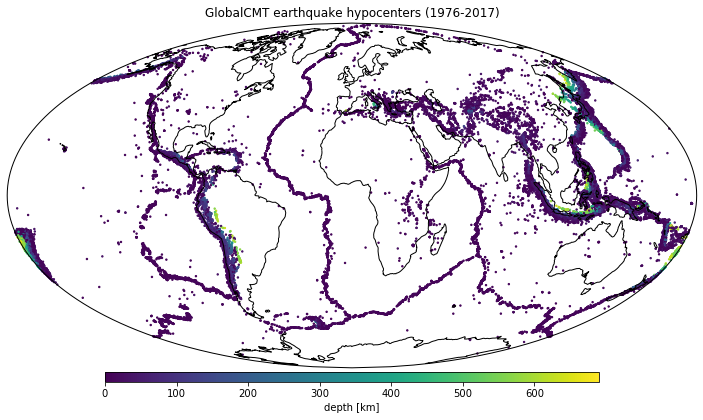

In [18]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_title("GlobalCMT earthquake hypocenters (1976-2017)")
# Scatter takes the point locations, size, and color
tmp = ax.scatter(quakes[:, 1], quakes[:, 0], s=2, c=quakes[:, 2], transform=ccrs.PlateCarree())
# Add a color bar related to the scatter we just plotted
plt.colorbar(tmp, label="depth [km]", orientation="horizontal", aspect=50, pad=0.01, shrink=0.7)
ax.coastlines()
plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0, right=0.99, left=0.01, hspace=0, wspace=0)
plt.savefig("global-seismicity.png", dpi=200)
plt.show()

## Age of the oceanic crust

The age of the oceanic crust dataset is a grid stored in [NetCDF](https://en.wikipedia.org/wiki/NetCDF) (usually with extension `.nc` or `.grd`). To handle this type of dataset, we will use the `xarray` library. The age grid was downloaded from [NOAA](https://www.ngdc.noaa.gov/mgg/ocean_age/ocean_age_2008.html).

In [11]:
with bz2.open("../../data/age.3.6.nc.bz2") as grid_file:
    age = xr.open_dataarray(grid_file)
age

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


<xarray.DataArray 'z' (y: 1801, x: 3601)>
[6485401 values with dtype=float32]
Coordinates:
  * x        (x) float32 -180.0 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9 180.0
  * y        (y) float32 -90.0 -89.9 -89.8 -89.7 -89.6 ... 89.7 89.8 89.9 90.0
Attributes:
    long_name:     z
    actual_range:  [    0. 28000.]

Convert to million years (see the [readme.txt](https://www.ngdc.noaa.gov/mgg/ocean_age/data/2008/grids/age/readme.txt) file).

In [12]:
age /= 100

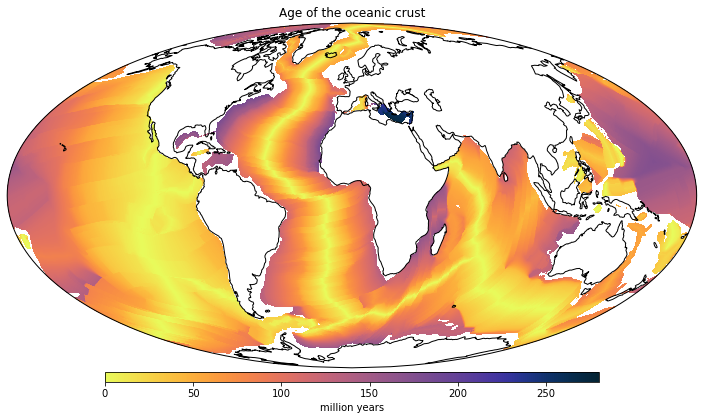

In [19]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_title("Age of the oceanic crust")
# Plot the grid using a nice color map from cmocean
tmp = ax.pcolormesh(
    age.x, age.y, age, transform=ccrs.PlateCarree(), 
    cmap=cmocean.cm.thermal_r,
)
plt.colorbar(tmp, label="million years", orientation="horizontal", aspect=50, pad=0.01, shrink=0.7)
ax.coastlines()
plt.subplots_adjust(top=0.95, bottom=0, right=0.99, left=0.01, hspace=0, wspace=0)
plt.savefig("lithosphere-age.png", dpi=200)
plt.show()

## Earth Relief

Load and plot the ETOPO1 Earth relief data. This is a 10 arc-minute downsampled version from [GMT](https://www.generic-mapping-tools.org/). Original source https://doi.org/10.7289/V5C8276M

In [14]:
topo = xr.open_dataarray("../../data/earth_relief_10m.grd")
topo

<xarray.DataArray 'z' (lat: 1081, lon: 2161)>
[2336041 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.7 -179.5 ... 179.7 179.8 180.0
  * lat      (lat) float64 -90.0 -89.83 -89.67 -89.5 ... 89.5 89.67 89.83 90.0
Attributes:
    long_name:     elevation (m)
    actual_range:  [-10399.   6280.]

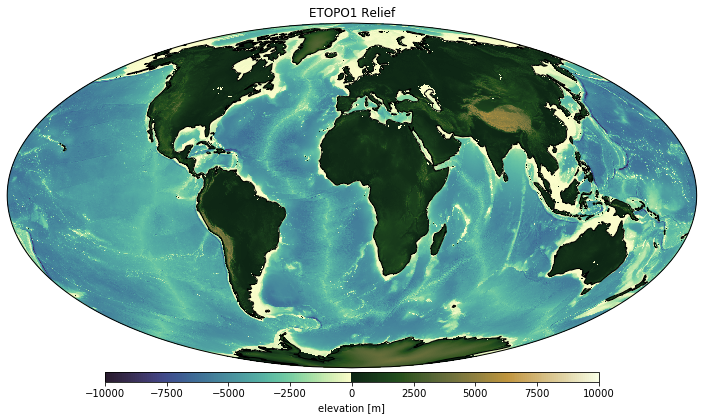

In [20]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_title("ETOPO1 Relief")
tmp = ax.pcolormesh(
    topo.lon, topo.lat, topo.values, transform=ccrs.PlateCarree(), 
    vmin=-10000, vmax=10000, cmap=cmocean.cm.topo
)
plt.colorbar(tmp, label="elevation [m]", orientation="horizontal", aspect=50, pad=0.01, shrink=0.7)
ax.coastlines()
plt.subplots_adjust(top=0.95, bottom=0, right=0.99, left=0.01, hspace=0, wspace=0)
plt.savefig("topography.png", dpi=200)
plt.show()